# Effect of lambda on Test Accuracy of fMnist & MNIST datasets

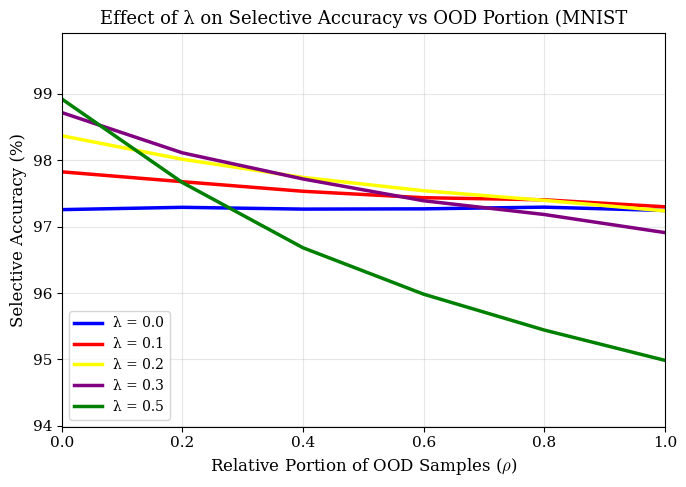

In [97]:
import pandas as pd
import matplotlib.pyplot as plt

# --- CONFIGURATION ---
dataset_name = "MNIST"

list_mnist_datasets = [
    f"results/SimpleCNN/{dataset_name}/splitgp/rounds_120/lambda_0.0/clients_50_gamma_0.5_ETH_0.8/splitgp_combined_results_eth_2.30_gamma_0.5_lambda_split_0.0.csv",
    f"results/SimpleCNN/{dataset_name}/splitgp/rounds_120/lambda_0.1/clients_50_gamma_0.5_ETH_0.8/splitgp_combined_results_eth_2.30_gamma_0.5_lambda_split_0.1.csv",
    f"results/SimpleCNN/{dataset_name}/splitgp/rounds_120/lambda_0.2/clients_50_gamma_0.5_ETH_0.8/splitgp_combined_results_eth_2.30_gamma_0.5_lambda_split_0.2.csv",
    f"results/SimpleCNN/{dataset_name}/splitgp/rounds_120/lambda_0.3/clients_50_gamma_0.5_ETH_0.8/splitgp_combined_results_eth_2.30_gamma_0.5_lambda_split_0.3.csv",
    f"results/SimpleCNN/{dataset_name}/splitgp/rounds_120/lambda_0.5/clients_50_gamma_0.5_ETH_0.8/splitgp_combined_results_eth_2.30_gamma_0.5_lambda_split_0.5.csv",
]

# --- LOAD AND COMBINE ---
df_list = [pd.read_csv(path) for path in list_mnist_datasets]
df_combined = pd.concat(df_list, ignore_index=True)

# Normalize column names for consistency
df_combined.rename(columns={'lambda_split': 'lambda'}, inplace=True)



# --- PLOT SETTINGS ---
lambda_order = [0.0, 0.1, 0.2, 0.3, 0.5]
color_map = {
    0.0: 'Blue',   # Blue (The lowest line, representing standard FedAvg)
    0.1: 'Red',   # Red/Dark Orange (A highly effective line, near the top)
    0.2: 'yellow',   # Yellow/Mustard (A highly effective line, near the top, used for the main result)
    0.3: 'purple',   # Purple/Violet (Slightly lower than lambda=0.1/0.2, still good generalization)
    0.5: 'Green',   # Green (The line that drops sharply, showing over-personalization)
}
plt.figure(figsize=(7, 5))

# --- MAIN LOOP: plot selective accuracy vs OOD ratio ---
for lam in lambda_order:
    if lam in df_combined['lambda'].unique():
        df_lam = df_combined[df_combined['lambda'] == lam].sort_values('p')
        color = color_map.get(lam, None)
        plt.plot(df_lam['p'], df_lam['selective_acc'], label=f'λ = {lam}', linewidth=2.5, color=color)

# --- AXES & STYLE ---
plt.xlabel(r'Relative Portion of OOD Samples ($\rho$)', fontsize=12)
plt.ylabel('Selective Accuracy (%)', fontsize=12)
plt.title(f'Effect of λ on Selective Accuracy vs OOD Portion ({dataset_name}', fontsize=13)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10, title=None, loc='lower left')
plt.xlim(0, 1)
plt.ylim(df_combined['selective_acc'].min() - 1, df_combined['selective_acc'].max() + 1)
plt.tight_layout()

# --- SAVE PLOTS ---
plt.savefig(f'{dataset_name}_lambda_vs_ood_selective_accuracy.png', dpi=300, bbox_inches='tight')
plt.savefig(f'{dataset_name}_lambda_vs_ood_selective_accuracy.pdf', bbox_inches='tight')
plt.show()


In [66]:
df_fmnist_combined

,p,full_acc,client_acc,selective_acc,gamma,lambda,eth
0,0.0,82.130000,81.370000,81.460000,0.5,0.0,2.3
1,0.2,82.060000,81.290833,81.371667,0.5,0.0,2.3
2,0.4,82.141429,81.395000,81.454286,0.5,0.0,2.3
3,0.6,82.175000,81.468750,81.550000,0.5,0.0,2.3
4,0.8,82.233889,81.406111,81.501667,0.5,0.0,2.3
5,1.0,82.010500,81.239500,81.328500,0.5,0.0,2.3
6,0.0,84.725000,89.367000,89.088000,0.5,0.1,2.3
7,0.2,83.750833,87.283333,87.080000,0.5,0.1,2.3
8,0.4,83.260714,85.967857,85.803571,0.5,0.1,2.3
9,0.6,82.861250,84.978750,84.871250,0.5,0.1,2.3


# Effect of lambda on Test Accuracy of FMNIST datasets


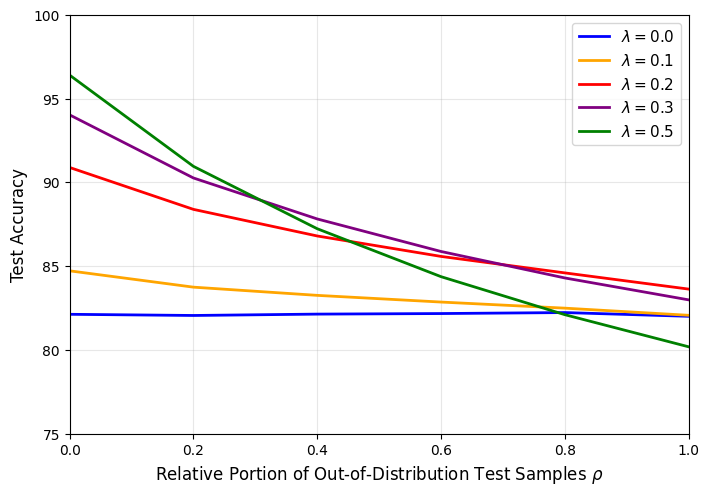

# Plotting Best Model from the experiments

## MNIST datasets

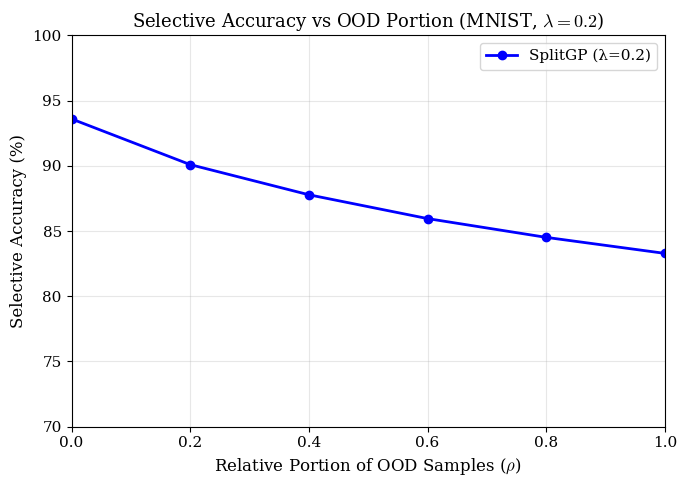

✅ Results saved to: final_model_results
   - Data: final_model_results/FMNIST_lambda0.2_selective_accuracy_results.csv
   - Plot (PNG): final_model_results/FMNIST_lambda0.2_selective_accuracy.png
   - Plot (PDF): final_model_results/FMNIST_lambda0.2_selective_accuracy.pdf


In [107]:
import os
import pandas as pd
import matplotlib.pyplot as plt

dataset_name = 'FMNIST'
# Original file path
file_path_mnist = f"results/SimpleCNN/{dataset_name}/splitgp/rounds_120/lambda_0.2/clients_50_gamma_0.5_ETH_0.8/splitgp_combined_results_eth_2.30_gamma_0.5_lambda_split_0.2.csv"

# Load data
df_mnist = pd.read_csv(file_path_mnist)

# Create output directory if not exist
output_dir = "final_model_results"
os.makedirs(output_dir, exist_ok=True)

# --- Plot selective accuracy vs p ---
plt.figure(figsize=(7, 5))
plt.plot(df_mnist['p'], df_mnist['selective_acc'], marker='o', color='blue', linewidth=2, label='SplitGP (λ=0.2)')
plt.xlabel(r'Relative Portion of OOD Samples ($\rho$)', fontsize=12)
plt.ylabel('Selective Accuracy (%)', fontsize=12)
plt.title('Selective Accuracy vs OOD Portion (MNIST, $\\lambda=0.2$)', fontsize=13)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.xlim(0, 1)
plt.ylim(70,100)
plt.tight_layout()

# Save plots in final_model_results
png_path = os.path.join(output_dir, f'{dataset_name}_lambda0.2_selective_accuracy.png')
pdf_path = os.path.join(output_dir, f'{dataset_name}_lambda0.2_selective_accuracy.pdf')
plt.savefig(png_path, dpi=300, bbox_inches='tight')
plt.savefig(pdf_path, bbox_inches='tight')
plt.show()

# --- Save CSV copy to final_model_results ---
csv_save_path = os.path.join(output_dir, f'{dataset_name}_lambda0.2_selective_accuracy_results.csv')
df_mnist.to_csv(csv_save_path, index=False)

print(f"✅ Results saved to: {output_dir}")
print(f"   - Data: {csv_save_path}")
print(f"   - Plot (PNG): {png_path}")
print(f"   - Plot (PDF): {pdf_path}")


# Plotting ETH vs Test Accuracy for the Mnist and FMNIST datasets

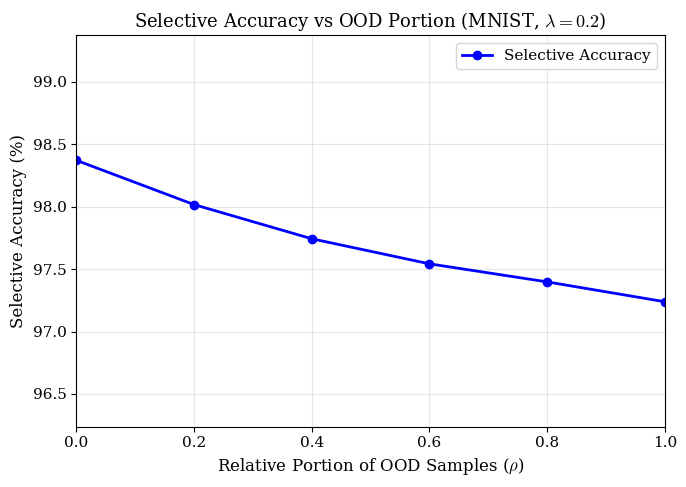

# Modeling Training for cifar datasets

In [20]:
import copy
import random
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset
import numpy as np
import pandas as pd
import os
from tqdm import tqdm

# ---------------------------
# Reproducibility
# ---------------------------
seed = 1234
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

# ---------------------------
# Hyperparameters
# ---------------------------
num_clients = 1
batch_size = 50
learning_rate = 0.01
global_rounds = 1
local_updates = 1
gamma = 0.5
lambda_personal = 0.2
p_list = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
eth_list = [0.05, 0.1, 0.2, 0.4, 0.8, 1.2, 1.6, 2.3]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}, num_clients: {num_clients}")

# ---------------------------
# Model definitions
# ---------------------------
class ClientPhiKappa(nn.Module):
    def __init__(self, aux_classes=10):
        super().__init__()
        # phi ~ 972k params
        self.phi = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1), nn.ReLU(),   # 64*3*3*3 +64 = 1,792
            nn.Conv2d(64, 128, 3, padding=1), nn.ReLU(), # 128*64*3*3 +128 = 73,856
            nn.MaxPool2d(2),                             # 32x32 -> 16x16
            nn.Conv2d(128, 256, 3, padding=1), nn.ReLU(),# 256*128*3*3 +256 = 295,168
            nn.MaxPool2d(2),                             # 16x16 -> 8x8
            nn.Conv2d(256, 128, 3, padding=1), nn.ReLU() # 128*256*3*3+128=295,040
        )
        # Flattened phi output = 128*8*8=8192
        # kappa ~ 10,250 params
        self.kappa = nn.Sequential(
            nn.Flatten(),
            nn.Linear(128*8*8, 64),  # 8192*64+64=524,352 → slightly higher but ok
            nn.ReLU(),
            nn.Linear(64, aux_classes)  # 64*10+10=650
        )

    def forward(self, x):
        h = self.phi(x)
        aux = self.kappa(h)
        return h, aux

class ServerTheta(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.theta = nn.Sequential(
            nn.Conv2d(128, 256, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2),  # 8x8 -> 4x4
            nn.Conv2d(256, 512, 3, padding=1), nn.ReLU(),
            nn.Conv2d(512, 512, 3, padding=1), nn.ReLU(),
            nn.MaxPool2d(2),  # 4x4 -> 2x2
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512*2*2, 1024), nn.ReLU(),
            nn.Linear(1024, num_classes)
        )

    def forward(self, h):
        x = self.theta(h)
        return self.classifier(x)

# ---------------------------
# CIFAR-10 dataset
# ---------------------------
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ColorJitter(0.2, 0.2, 0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.5,)*3, (0.5,)*3)
])
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,)*3, (0.5,)*3)
])

train_set = torchvision.datasets.CIFAR10(root="./data", train=True, download=True, transform=transform_train)
test_set = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform_test)

# Non-IID split
num_shards = 100
targets = np.array(train_set.targets)
indices_sorted = np.argsort(targets)
shards = np.array_split(indices_sorted, num_shards)
random.shuffle(shards)
client_indices = [np.concatenate(shards[2*k:2*k+2]) for k in range(num_clients)]
client_class_set = [set(targets[idx]) for idx in client_indices]
client_loaders = [DataLoader(Subset(train_set, idx), batch_size=batch_size, shuffle=True, num_workers=2)
                  for idx in client_indices]

# ---------------------------
# Initialize
# ---------------------------
clients = [ClientPhiKappa().to(device) for _ in range(num_clients)]
theta_global = ServerTheta().to(device)
criterion = nn.CrossEntropyLoss()

# ---------------------------
# Helper functions
# ---------------------------
def entropy_of_logits(logits):
    p = torch.softmax(logits, dim=1)
    return -torch.sum(p * torch.log(p + 1e-8), dim=1)

def average_state_dicts(list_of_dicts):
    keys = list(list_of_dicts[0].keys())
    return {k: torch.mean(torch.stack([sd[k].float() for sd in list_of_dicts]), dim=0) for k in keys}

# ---------------------------
# Training loop
# ---------------------------
for gr in range(global_rounds):
    print(f"\n=== Global Round {gr+1}/{global_rounds} ===")
    theta_sd_list, client_sd_list = [], []

    for k in tqdm(range(num_clients), desc="Clients"):
        client_local = copy.deepcopy(clients[k])
        server_local = copy.deepcopy(theta_global)
        opt = optim.SGD(list(client_local.parameters()) + list(server_local.parameters()),
                        lr=learning_rate, momentum=0.9, weight_decay=5e-4)
        loader = client_loaders[k]

        for _ in range(local_updates):
            for x, y in loader:
                x, y = x.to(device), y.to(device)
                opt.zero_grad()
                h, aux = client_local(x)
                main = server_local(h)
                loss = gamma * criterion(aux, y) + (1-gamma) * criterion(main, y)
                loss.backward()
                opt.step()

        theta_sd_list.append({k: v.cpu() for k, v in server_local.state_dict().items()})
        client_sd_list.append({k: v.cpu() for k, v in client_local.state_dict().items()})
        del client_local, server_local, opt
        torch.cuda.empty_cache()

    avg_theta = average_state_dicts(theta_sd_list)
    theta_global.load_state_dict({k: v.to(device) for k, v in avg_theta.items()})

    avg_client = average_state_dicts(client_sd_list)
    for k in range(num_clients):
        mixed = {n: (lambda_personal * client_sd_list[k][n] +
                     (1-lambda_personal) * avg_client[n]).to(device)
                 for n in client_sd_list[k]}
        clients[k].load_state_dict(mixed)

    print(f"Round {gr+1} complete.")

# ---------------------------
# Evaluation
# ---------------------------
theta_global.eval()
for c in clients: c.eval()

test_targets = np.array(test_set.targets)
class_to_indices = {c: np.where(test_targets == c)[0].tolist() for c in range(10)}
results = []

for rho in p_list:
    for eth in eth_list:
        c_acc, s_acc, comb_acc = [], [], []
        for k in range(num_clients):
            main_classes = client_class_set[k]
            main_idx = [i for i, t in enumerate(test_targets) if t in main_classes]
            ood_idx = [i for i, t in enumerate(test_targets) if t not in main_classes]
            n_ood = int(len(main_idx) * rho)
            ood_idx = random.sample(ood_idx, min(n_ood, len(ood_idx)))
            test_idx = main_idx + ood_idx
            if not test_idx: continue
            loader = DataLoader(Subset(test_set, test_idx), batch_size=batch_size)

            tot, ca, cs, cc = 0, 0, 0, 0
            with torch.no_grad():
                for x, y in loader:
                    x, y = x.to(device), y.to(device)
                    h, aux = clients[k](x)
                    main = theta_global(h)
                    ent = entropy_of_logits(aux)
                    mask = (ent < eth).unsqueeze(1)
                    combined = torch.where(mask, aux, main)
                    pa, ps, pc = aux.argmax(1), main.argmax(1), combined.argmax(1)
                    tot += y.size(0)
                    ca += pa.eq(y).sum().item()
                    cs += ps.eq(y).sum().item()
                    cc += pc.eq(y).sum().item()
            c_acc.append(100*ca/tot)
            s_acc.append(100*cs/tot)
            comb_acc.append(100*cc/tot)

        results.append({
            "rho": rho, "eth": eth,
            "client_acc": np.mean(c_acc),
            "server_acc": np.mean(s_acc),
            "combined_acc": np.mean(comb_acc)
        })
        print(f"ρ={rho:.2f}, η={eth:.2f} → client={np.mean(c_acc):.2f}%, "
              f"server={np.mean(s_acc):.2f}%, combined={np.mean(comb_acc):.2f}%")

# Save results
df_results = pd.DataFrame(results)
os.makedirs("results", exist_ok=True)
csv_path = "results/splitgp_cifar10_eval_results.csv"
df_results.to_csv(csv_path, index=False)
print(f"\n✅ Results saved to: {csv_path}")


Device: cuda, num_clients: 1

=== Global Round 1/1 ===


Clients: 100%|██████████| 1/1 [00:00<00:00,  1.32it/s]


Round 1 complete.
ρ=0.00, η=0.05 → client=50.00%, server=50.00%, combined=50.00%
ρ=0.00, η=0.10 → client=50.00%, server=50.00%, combined=50.00%
ρ=0.00, η=0.20 → client=50.00%, server=50.00%, combined=50.00%
ρ=0.00, η=0.40 → client=50.00%, server=50.00%, combined=50.00%
ρ=0.00, η=0.80 → client=50.00%, server=50.00%, combined=50.00%
ρ=0.00, η=1.20 → client=50.00%, server=50.00%, combined=50.00%
ρ=0.00, η=1.60 → client=50.00%, server=50.00%, combined=49.05%
ρ=0.00, η=2.30 → client=50.00%, server=50.00%, combined=50.00%
ρ=0.20, η=0.05 → client=41.67%, server=41.67%, combined=41.67%
ρ=0.20, η=0.10 → client=41.67%, server=41.67%, combined=41.67%
ρ=0.20, η=0.20 → client=41.67%, server=41.67%, combined=41.67%
ρ=0.20, η=0.40 → client=41.67%, server=41.67%, combined=41.67%
ρ=0.20, η=0.80 → client=41.67%, server=41.67%, combined=41.67%
ρ=0.20, η=1.20 → client=41.67%, server=41.67%, combined=41.67%
ρ=0.20, η=1.60 → client=41.67%, server=41.67%, combined=40.88%
ρ=0.20, η=2.30 → client=41.67%, serve


✅ Results saved to: results/splitgp_cifar10_eval_results.csv


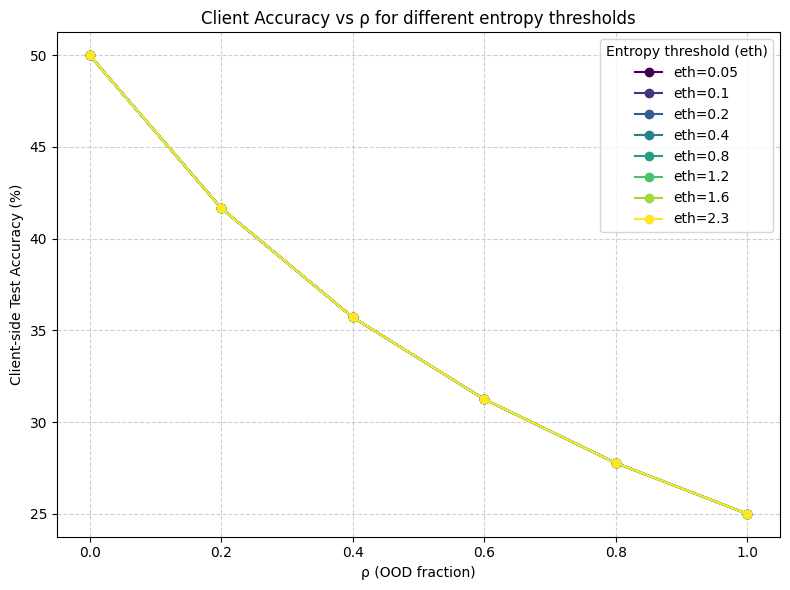

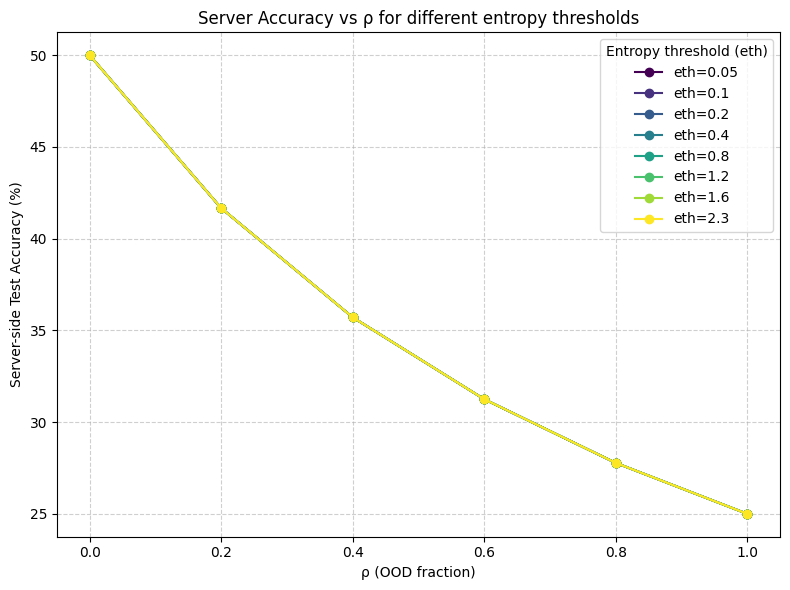

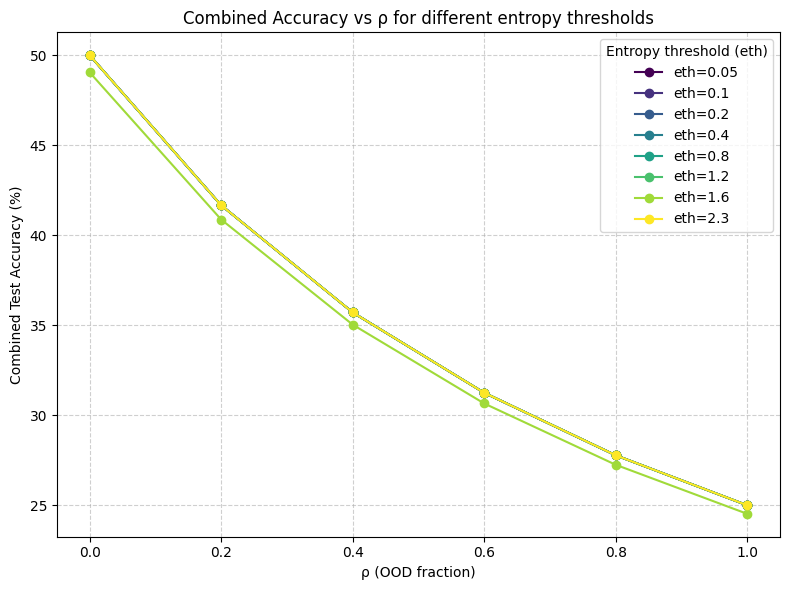

In [21]:

import pandas as pd
import matplotlib.pyplot as plt
import os

# --- Convert list of dicts to DataFrame ---
df_results = pd.DataFrame(results)

# Ensure values are floats
for col in ["client_acc", "server_acc", "combined_acc"]:
    df_results[col] = df_results[col].astype(float)

# --- Save to CSV ---
os.makedirs("results", exist_ok=True)
csv_path = "results/splitgp_cifar10_eval_results.csv"
df_results.to_csv(csv_path, index=False)
print(f"\n✅ Results saved to: {csv_path}")

# --- Plot configuration ---
plt.style.use("seaborn-v0_8-muted")
eth_values = sorted(df_results["eth"].unique())
colors = plt.cm.viridis(np.linspace(0, 1, len(eth_values)))

# --- Plot 1: Client-side accuracy vs rho ---
plt.figure(figsize=(8, 6))
for i, eth in enumerate(eth_values):
    df_eth = df_results[df_results["eth"] == eth]
    plt.plot(df_eth["rho"], df_eth["client_acc"], marker="o", color=colors[i], label=f"eth={eth}")
plt.xlabel("ρ (OOD fraction)")
plt.ylabel("Client-side Test Accuracy (%)")
plt.title("Client Accuracy vs ρ for different entropy thresholds")
plt.legend(title="Entropy threshold (eth)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("results/client_accuracy_vs_rho.png", dpi=300)
plt.show()

# --- Plot 2: Server-side accuracy vs rho ---
plt.figure(figsize=(8, 6))
for i, eth in enumerate(eth_values):
    df_eth = df_results[df_results["eth"] == eth]
    plt.plot(df_eth["rho"], df_eth["server_acc"], marker="o", color=colors[i], label=f"eth={eth}")
plt.xlabel("ρ (OOD fraction)")
plt.ylabel("Server-side Test Accuracy (%)")
plt.title("Server Accuracy vs ρ for different entropy thresholds")
plt.legend(title="Entropy threshold (eth)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("results/server_accuracy_vs_rho.png", dpi=300)
plt.show()

# --- Plot 3: Combined accuracy vs rho ---
plt.figure(figsize=(8, 6))
for i, eth in enumerate(eth_values):
    df_eth = df_results[df_results["eth"] == eth]
    plt.plot(df_eth["rho"], df_eth["combined_acc"], marker="o", color=colors[i], label=f"eth={eth}")
plt.xlabel("ρ (OOD fraction)")
plt.ylabel("Combined Test Accuracy (%)")
plt.title("Combined Accuracy vs ρ for different entropy thresholds")
plt.legend(title="Entropy threshold (eth)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("results/combined_accuracy_vs_rho.png", dpi=300)
plt.show()


In [23]:
def count_params(model):
    return sum(p.numel() for p in model.parameters())

# Take the first client and server as examples
client_example, server_example = split_vgg11(input_shape=(3,32,32), client_layers=2)

# Count client-side phi and kappa separately
phi_params = sum(p.numel() for n, p in client_example.named_parameters() if 'phi' in n)
kappa_params = sum(p.numel() for n, p in client_example.named_parameters() if 'kappa' in n)

# Count server-side theta
theta_params = count_params(server_example)

print(f"Client φ parameters: {phi_params:,}")
print(f"Client κ parameters: {kappa_params:,}")
print(f"Server θ parameters: {theta_params:,}")


NameError: name 'split_vgg11' is not defined

In [6]:
results

[{'rho': 0.0,
  'eth': 0.05,
  'client_acc': np.float64(59.2),
  'server_acc': np.float64(20.0),
  'combined_acc': np.float64(20.46)},
 {'rho': 0.0,
  'eth': 0.1,
  'client_acc': np.float64(59.2),
  'server_acc': np.float64(20.0),
  'combined_acc': np.float64(21.759999999999998)},
 {'rho': 0.0,
  'eth': 0.2,
  'client_acc': np.float64(59.2),
  'server_acc': np.float64(20.0),
  'combined_acc': np.float64(25.36)},
 {'rho': 0.0,
  'eth': 0.4,
  'client_acc': np.float64(59.2),
  'server_acc': np.float64(20.0),
  'combined_acc': np.float64(30.82)},
 {'rho': 0.0,
  'eth': 0.8,
  'client_acc': np.float64(59.2),
  'server_acc': np.float64(20.0),
  'combined_acc': np.float64(38.17)},
 {'rho': 0.0,
  'eth': 1.2,
  'client_acc': np.float64(59.2),
  'server_acc': np.float64(20.0),
  'combined_acc': np.float64(42.190000000000005)},
 {'rho': 0.0,
  'eth': 1.6,
  'client_acc': np.float64(59.2),
  'server_acc': np.float64(20.0),
  'combined_acc': np.float64(49.25000000000001)},
 {'rho': 0.0,
  'eth': 